In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/languages_dataset (1).csv'

In [0]:
data = pd.read_csv(root_path)
data

,name,result,wpo1,components,SV,VO,OV,AdjN,NounRelCl,GenNoun,NegV,NegParticle,NegAffix,flective,agglutinative,synth_index,agglut_index
0,russian,0.235,0,69,1,1,0,1,1,0,1,1,0,1,0,NaN,NaN
1,spanish,0.364,3,81,1,1,0,0,1,0,1,1,0,1,0,NaN,NaN
2,french,0.299,3,77,1,1,0,0,1,0,0,1,0,1,0,NaN,NaN
3,italian,0.179,3,42,1,1,0,0,1,0,1,1,0,1,0,NaN,NaN
4,german,0.289,3,73,1,0,0,1,1,0,0,1,0,1,0,NaN,NaN
5,finnish,0.122,3,69,1,1,0,1,1,1,1,0,0,0,1,NaN,NaN
6,japanese,0.120,0,80,1,0,1,1,0,1,0,0,1,0,1,2.71,0.86
7,hindi,0.144,0,40,1,0,1,1,0,1,1,0,1,0,0,1.74,0.34
8,turkish,0.134,1,92,1,0,1,1,0,1,0,0,1,0,1,2.15,0.98
9,vietnamese,0.369,1,23,1,1,0,0,1,0,1,0,0,0,0,1.52,1.00


In [0]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [0]:
cl_enc = OrdinalEncoder()
cl_enc.fit(data[['wpo1']])
cl_bin = cl_enc.transform(data[['wpo1']])
ct = ColumnTransformer(
    [
        ('wpo1', OneHotEncoder(sparse=False, categories='auto'), ['wpo1'])
    ],
    remainder='drop'
)
ct.fit(data)
ct.transform(data)

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [0]:
x = pd.DataFrame(ct.transform(data), columns=[x.replace('__x0', '') for x in ct.get_feature_names()])
x

,wpo1_0,wpo1_1,wpo1_2,wpo1_3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0
6,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0


In [0]:
data.drop('wpo1', axis=1, inplace=True)
data = data.join(x)

In [0]:
data

,name,result,components,SV,VO,OV,AdjN,NounRelCl,GenNoun,NegV,NegParticle,NegAffix,flective,agglutinative,synth_index,agglut_index,wpo1_0,wpo1_1,wpo1_2,wpo1_3
0,russian,0.235,69,1,1,0,1,1,0,1,1,0,1,0,NaN,NaN,1.0,0.0,0.0,0.0
1,spanish,0.364,81,1,1,0,0,1,0,1,1,0,1,0,NaN,NaN,0.0,0.0,0.0,1.0
2,french,0.299,77,1,1,0,0,1,0,0,1,0,1,0,NaN,NaN,0.0,0.0,0.0,1.0
3,italian,0.179,42,1,1,0,0,1,0,1,1,0,1,0,NaN,NaN,0.0,0.0,0.0,1.0
4,german,0.289,73,1,0,0,1,1,0,0,1,0,1,0,NaN,NaN,0.0,0.0,0.0,1.0
5,finnish,0.122,69,1,1,0,1,1,1,1,0,0,0,1,NaN,NaN,0.0,0.0,0.0,1.0
6,japanese,0.120,80,1,0,1,1,0,1,0,0,1,0,1,2.71,0.86,1.0,0.0,0.0,0.0
7,hindi,0.144,40,1,0,1,1,0,1,1,0,1,0,0,1.74,0.34,1.0,0.0,0.0,0.0
8,turkish,0.134,92,1,0,1,1,0,1,0,0,1,0,1,2.15,0.98,0.0,1.0,0.0,0.0
9,vietnamese,0.369,23,1,1,0,0,1,0,1,0,0,0,0,1.52,1.00,0.0,1.0,0.0,0.0


In [0]:
data.drop('name', axis=1, inplace=True)

(19.5, -0.5)

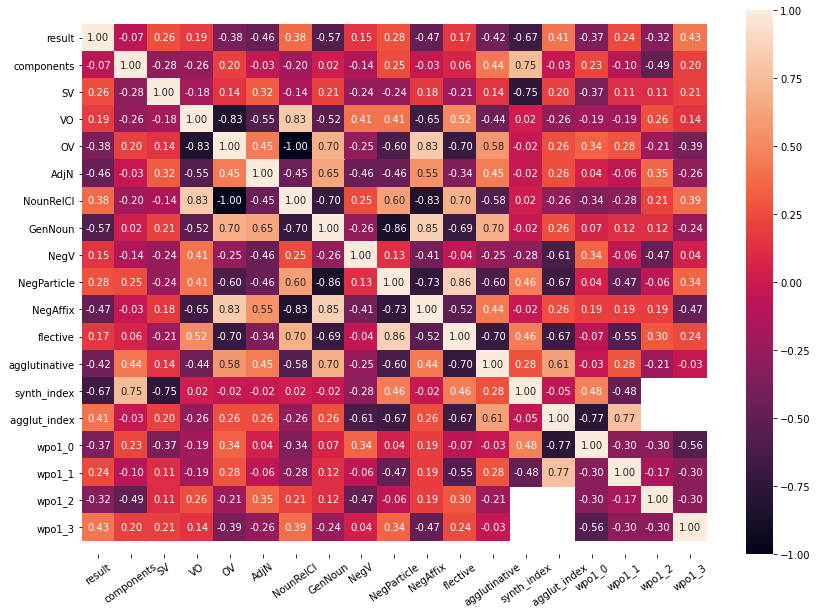

In [0]:
plt.figure(figsize=(14, 10))
ax = sns.heatmap(data.corr(), annot=True, fmt=".2f")
bottom, top = ax.get_ylim()
plt.xticks(rotation=35)
ax.set_ylim(bottom + 0.5, top - 0.5)

(19.5, -0.5)

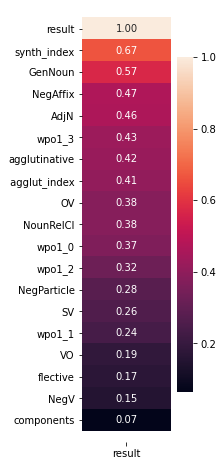

In [0]:
plt.figure(figsize=(2, 8))
ax = sns.heatmap(np.abs(data.corr()[['result']]).sort_values(by=['result'], ascending=False), annot=True, fmt=".2f") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)